In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# PROJE 5: ABD Eyalet Segmentasyonu
# PROJE 5: RFM metrikler Göre unsupervised machine learning segmentation

In [2]:
df = pd.read_csv("./USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
sc = MinMaxScaler((0,1))

In [39]:
df = sc.fit_transform(df)

In [40]:
df 

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [20]:
kmeans = KMeans(n_clusters = 4)

In [21]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
k_fit = kmeans.fit(df)

In [23]:
k_fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
k_fit.n_clusters

4

In [25]:
k_fit.cluster_centers_

array([[0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868]])

In [26]:
k_fit.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 0, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

# Kümelerin Görselleştirilmesi

In [27]:
k_means = KMeans(n_clusters = 2).fit(df)

In [28]:
kumeler = k_means.labels_

In [29]:
kumeler

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [31]:
df = pd.DataFrame(df)

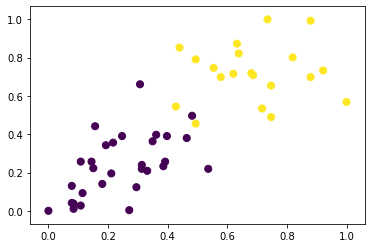

In [32]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis");

In [33]:
merkezler = k_means.cluster_centers_

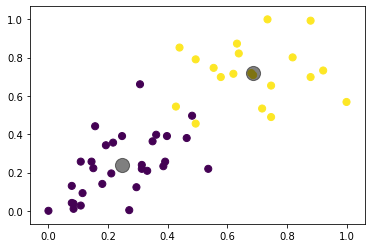

In [34]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha=0.5);

# Optimum Küme Sayısının Belirlenmesi

In [41]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)

In [43]:
?k_fit

Type:        KMeans
String form:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of s

In [44]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

In [45]:
ssd

[13.184122550256445,
 6.596893867946197,
 5.010878493006417,
 3.6834561535859134,
 3.1850219324724334,
 2.931642700138645,
 2.5415133542133863,
 2.305275446251113,
 2.0822095963594274,
 1.9240854701754284,
 1.6816081693878433,
 1.5348007079171038,
 1.4193968884900543,
 1.3682298027359816,
 1.2137980948625848,
 1.1248036505115377,
 1.017305339683162,
 1.0038463745925135,
 0.9300359516998769,
 0.8909973980121493,
 0.8112567327507116,
 0.7684881079985879,
 0.6705903625300718,
 0.6093717534743532,
 0.6026849559721665,
 0.5262772155585818,
 0.46595474634485373,
 0.42465338632684496,
 0.39344628849023944]

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

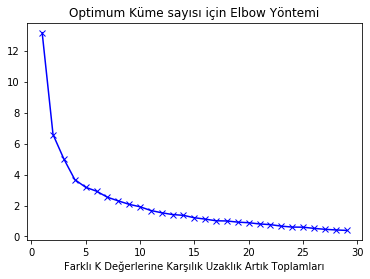

In [46]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [ ]:
#!pip install yellowbrick

In [47]:
from yellowbrick.cluster import KElbowVisualizer

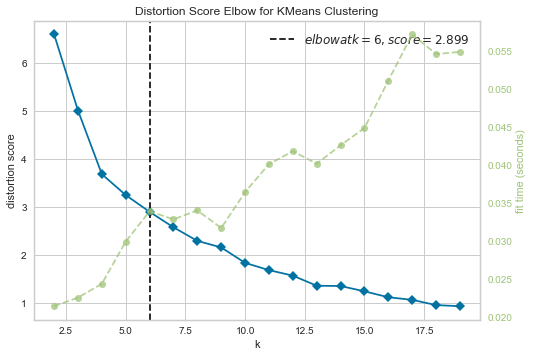

In [49]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df)
visu.poof();

In [50]:
kmeans = KMeans(n_clusters = 6).fit(df)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
kumeler = kmeans.labels_

In [52]:
kumeler

array([3, 5, 4, 0, 4, 4, 2, 0, 4, 3, 2, 1, 4, 0, 1, 0, 0, 3, 1, 4, 2, 4,
       1, 3, 0, 1, 1, 4, 1, 2, 4, 4, 3, 1, 0, 0, 0, 2, 2, 3, 1, 3, 4, 2,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [54]:
df = pd.read_csv("./USArrests.csv", index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [55]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,3
1,Alaska,5
2,Arizona,4
3,Arkansas,0
4,California,4
5,Colorado,4
6,Connecticut,2
7,Delaware,0
8,Florida,4
9,Georgia,3


In [56]:
df["cluster_no"] = kumeler

In [57]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_no
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,5
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,4


In [58]:
df["cluster_no"] = df["cluster_no"] + 1

In [59]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_no
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,6
Arizona,8.1,294,80,31.0,5
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,5


In [62]:
df.groupby("cluster_no").agg({"cluster_no":"count"})

,cluster_no
cluster_no,
1,12
2,12
3,7
4,7
5,11
6,1


In [63]:
df[df["cluster_no"] == 6]

,Murder,Assault,UrbanPop,Rape,cluster_no
Alaska,10.0,263,48,44.5,6


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0
cluster_no,50.0,2.920,1.562834,1.0,2.000,3.00,4.000,6.0


In [66]:
df.groupby("cluster_no").agg(np.mean)

,Murder,Assault,UrbanPop,Rape
cluster_no,,,,
1,7.058333,152.916667,65.083333,21.000000
2,3.091667,76.000000,52.083333,11.833333
3,4.757143,123.428571,81.857143,16.071429
4,14.671429,251.285714,54.285714,21.685714
5,11.054545,264.090909,79.090909,32.618182
6,10.000000,263.000000,48.000000,44.500000


# Hiyerarşik Kümeleme

In [67]:
from scipy.cluster.hierarchy import linkage

In [72]:
?linkage

Signature: linkage(y, method='single', metric='euclidean', optimal_ordering=False)
Docstring:
Perform hierarchical/agglomerative clustering.

The input y may be either a 1d condensed distance matrix
or a 2d array of observation vectors.

If y is a 1d condensed distance matrix,
then y must be a :math:`\binom{n}{2}` sized
vector where n is the number of original observations paired
in the distance matrix. The behavior of this function is very
similar to the MATLAB linkage function.

A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
:math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
cluster with an index less than :math:`n` corresponds to one of
the :math:`n` original observations. The distance between
clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
fourth value ``Z[i, 3]`` represents the number of original
observations in the newly formed cluster.

The following linkage methods are used to compute 

In [68]:
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")

In [69]:
from scipy.cluster.hierarchy import dendrogram

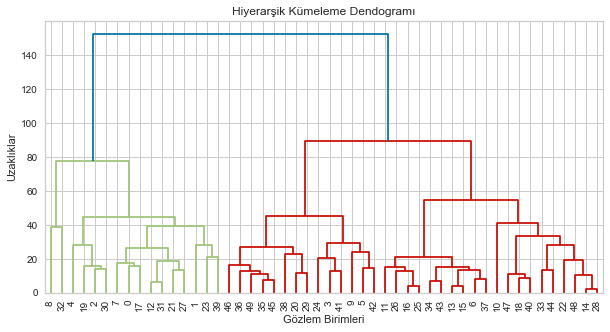

In [71]:
plt.figure(figsize = (10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
          leaf_font_size = 10);

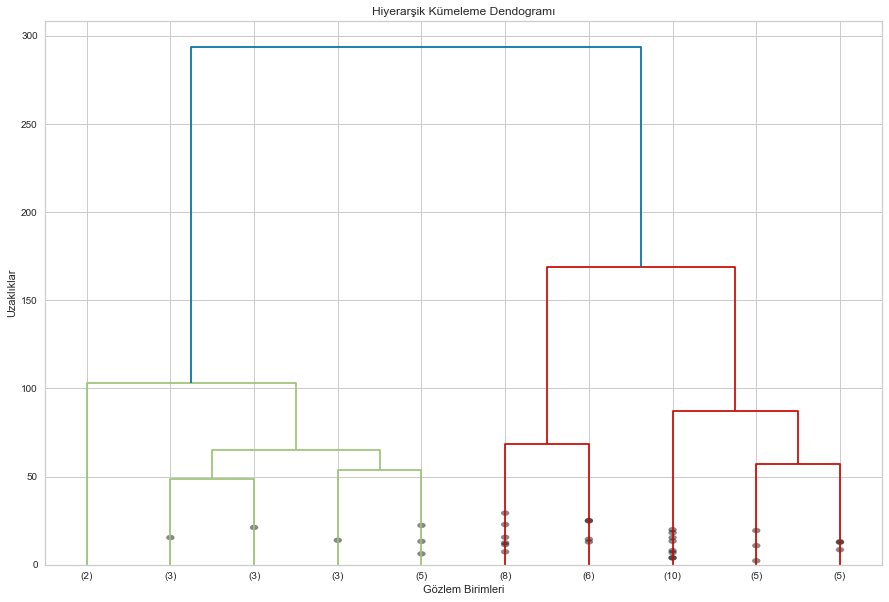

In [73]:
plt.figure(figsize = (15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
          leaf_font_size = 10);

# Temel Bileşen Analizi


In [30]:
df = pd.read_csv("./Hitters.csv")
df.dropna(inplace = True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
df = StandardScaler().fit_transform(df)

In [34]:
df[0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292,
        -0.0975271 ,  1.3978935 ,  0.3467905 ,  0.1743734 , -0.0029198 ,
        -0.12167086,  0.25896561,  0.43533435,  1.22149851, -0.52319133,
         0.21335208, -0.1353126 ],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962,
         1.6093726 , -0.90120024, -0.45286539, -0.4098921 , -0.07605382,
        -0.41510491, -0.19959036,  0.010373  ,  2.10910888, -0.25386267,
         0.81996395, -0.12420791],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654,
        -0.18979195,  0.77086793,  1.30155773,  1.31817358,  1.89856469,
         1.41205144,  1.57266648,  0.3556541 , -0.32466148, -0.74417894,
        -0.84821868, -0.07978915],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498,
        -0.51271892, -1.11020876, -0.99093521, -0.96015272, -0.69769298,
        -0.94752134, -0.88122761, -0.86231547,  1.84067833, -0.54390892,
        -0.69656571

In [38]:
df.shape

(263, 17)

In [35]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components = 5)
pca_fit = pca.fit_transform(df)

In [49]:
pca_fit

array([[ 0.07684824,  1.65352465,  0.08822766,  1.46279093,  0.4694797 ],
       [ 0.33712679, -2.32055981, -0.69457082,  1.57514345,  0.31527879],
       [ 3.40836188,  0.75575651, -0.96993707, -1.1205432 ,  0.73293692],
       ...,
       [-1.20632164, -0.62571443,  0.25214952, -0.62359809, -1.42396615],
       [ 2.08485639, -2.05985085, -0.16640456,  3.35810448, -0.43859562],
       [ 1.97796295, -0.20809992, -0.26984563,  0.43253925, -1.05971425]])

In [50]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 , 0.0539344 , 0.04161435])

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.45245466, 0.69492267, 0.79661947, 0.85055387, 0.89216822])

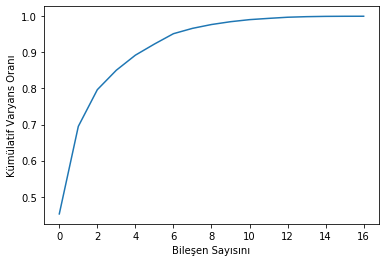

In [52]:
#optimum bilesen sayisi
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı");

In [53]:
#final
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [54]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])